In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoMinorLocator
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
orange = ["#ffac00"]
darkorange = ["#e69138"]
blue = ["#4173b3"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
etgent_file = h5py.File("../data/processed_data/GS_EtgEnt_Lx8_Ly8_LA16_N32_beta50.0.jld", "r")
shannon_file = h5py.File("../data/processed_data/GS_H2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq_file = h5py.File("../data/processed_data/GS_Pn_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq2_file = h5py.File("../data/processed_data/GS_Pn2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")

U = shannon_file['U'][:]
idx = [1,2,3,4,6,8]
S2 = [ufloat(n, u) for n, u in zip(etgent_file['S2_avg'][idx], etgent_file['S2_err'][idx])]
S2_avg = [yi.n for yi in S2]
S2_err = [yi.s for yi in S2]

Hn = [ufloat(n, u) for n, u in zip(shannon_file['Hn2_avg'][:]['re_'], shannon_file['Hn2_err'][:]['re_'])]
Hn_avg = [yi.n for yi in Hn]
Hn_err = [yi.s for yi in Hn]
Hm = [ufloat(n, u) for n, u in zip(shannon_file['Hm2_avg'][:]['re_'], shannon_file['Hm2_err'][:]['re_'])]
Hm_avg = [yi.n for yi in Hm]
Hm_err = [yi.s for yi in Hm]

# accessible EE
S2n_acc = [S2[n] - Hn[n] for n in range(6)]
S2n_acc_avg = [yi.n for yi in S2n_acc]
S2n_acc_err = [yi.s for yi in S2n_acc]

S2m_acc = [S2[n] - Hm[n] for n in range(6)]
S2m_acc_avg = [yi.n for yi in S2m_acc]
S2m_acc_err = [yi.s for yi in S2m_acc]

# symmetry-resolved EE
Pn_8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 24]['re_'], Pq_file['Pn_err'][:, 24]['re_'])]
Pn_9 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 23]['re_'], Pq_file['Pn_err'][:, 23]['re_'])]
Pn_10 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][:, 22]['re_'], Pq_file['Pn_err'][:, 22]['re_'])]
Pn2_8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 24]['re_'], Pq2_file['Pn2_err'][:, 24]['re_'])]
Pn2_9 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 23]['re_'], Pq2_file['Pn2_err'][:, 23]['re_'])]
Pn2_10 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][:, 22]['re_'], Pq2_file['Pn2_err'][:, 22]['re_'])]

Pm_0 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][:, 16]['re_'], Pq_file['Pm_err'][:, 16]['re_'])]
Pm2_0 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][:, 16]['re_'], Pq2_file['Pm2_err'][:, 16]['re_'])]

dSn_8 = [unp.log(Pn2_8[n] / Pn_8[n]**2) for n in range(6)]
dSn_8_avg = [unp.nominal_values(yi) for yi in dSn_8]
dSn_8_err = [unp.std_devs(yi) for yi in dSn_8]
dSn_9 = [unp.log(Pn2_9[n] / Pn_9[n]**2) for n in range(6)]
dSn_9_avg = [unp.nominal_values(yi) for yi in dSn_9]
dSn_9_err = [unp.std_devs(yi) for yi in dSn_9]
dSn_10 = [unp.log(Pn2_10[n] / Pn_10[n]**2) for n in range(6)]
dSn_10_avg = [unp.nominal_values(yi) for yi in dSn_10]
dSn_10_err = [unp.std_devs(yi) for yi in dSn_10]
dSm_0 = [unp.log(Pm2_0[n] / Pm_0[n]**2) for n in range(6)]
dSm_0_avg = [unp.nominal_values(yi) for yi in dSm_0]
dSm_0_err = [unp.std_devs(yi) for yi in dSm_0]

C:\Users\Tong\AppData\Local\Temp\ipykernel_13704\3662570033.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


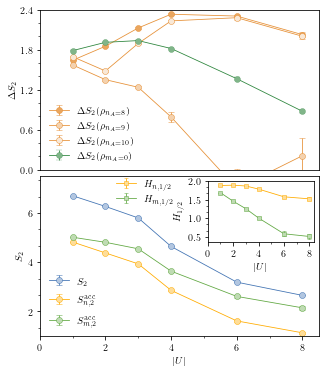

In [10]:
#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 6))
fig = plt.figure(figsize=(5, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1], hspace=0.04)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plotting on the first subplot
ax1.set_ylabel(r'$\Delta S_2$')
ax1.set_xticks([])
ax1.set_yticks([0.0, 0.6, 1.2, 1.8, 2.4])
#ax1.tick_params(axis='y', which='major', labelsize=16)
ax1.set_ylim([0,2.4])
ax1.errorbar(
    abs(U), dSn_8_avg, yerr=dSn_8_err, 
    zorder=3,
    label=r'$\Delta S_2(\rho_{n_A=8})$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[2], markeredgewidth=0.5
)

ax1.errorbar(
    abs(U), dSn_9_avg, yerr=dSn_9_err, 
    zorder=3,
    label=r'$\Delta S_2(\rho_{n_A=9})$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[4], markeredgewidth=0.5
)

ax1.errorbar(
    abs(U), dSn_10_avg, yerr=dSn_10_err, 
    zorder=3,
    label=r'$\Delta S_2(\rho_{n_A=10})$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[5], markeredgewidth=0.5
)

ax1.errorbar(
    abs(U), dSm_0_avg, yerr=dSm_0_err, 
    zorder=3,
    label=r'$\Delta S_2(\rho_{m_A=0})$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkgreen[0],
    markerfacecolor=darkgreen[3], markeredgewidth=0.25
)

ax1.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(0.00, 0.00))

# Plotting on the second subplot
ax2.errorbar(
    abs(U), S2_avg, yerr=S2_err, 
    label=r'$S_2$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
ax2.errorbar(
    abs(U), S2n_acc_avg, yerr=S2n_acc_err, 
    label=r'$S^{\mathrm{acc}}_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=orange[0],
    markerfacecolor=orange[4], markeredgewidth=0.5
)
ax2.errorbar(
    abs(U), S2m_acc_avg, yerr=S2m_acc_err, 
    label=r'$S^{\mathrm{acc}}_{m,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[4], markeredgewidth=0.5
)

ax2.set_xlabel(r'$|U|$')
ax2.set_ylabel(r'$S_2$')
ax2.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0])
#ax2.tick_params(axis='x', which='major', labelsize=16)
ax2.set_ylim([1.0,7.5])
ax2.set_yticks([2.0, 4.0, 6.0])
#ax2.tick_params(axis='y', which='major', labelsize=16)
ax2.legend(frameon=False, ncol=1, loc='lower left', labelspacing=1.0, bbox_to_anchor=(0.00, 0.00))


# Creating an inset inside the second subplot
axins = inset_axes(ax2, width='38%', height='38%', loc='upper right')

axins.errorbar(
    abs(U), Hn_avg, yerr=Hn_err, 
    label=r'$H_{n, 1/2}$', 
    linewidth=0.8, elinewidth=0.8,
    color=orange[0],
    fmt='-s', markersize=4, capsize=2, capthick=1,
    markerfacecolor=orange[4], 
    markeredgecolor=orange[0], markeredgewidth=0.5
)
axins.errorbar(
    abs(U), Hm_avg, yerr=Hm_err, 
    label=r'$H_{m, 1/2}$', 
    zorder=1000,
    linewidth=0.8, elinewidth=0.8,
    color=green[0],
    fmt='-s', markersize=4, capsize=2, capthick=1,
    markerfacecolor=green[4], 
    markeredgecolor=green[0], markeredgewidth=0.5
)

axins.set_xlabel(r'$|U|$')
axins.set_ylabel(r'$H_{1/2}$')
axins.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0])
axins.set_yticks([0.5, 1.0, 1.5, 2.0])
axins.legend(frameon=False, ncol=1, loc='lower left', bbox_to_anchor=(-0.95, 0.45))

ax1.set_xlim([0.0, 8.5])
ax2.set_xlim([0.0, 8.5])

# Add minor ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator(n=2))
axins.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(n=3))
ax2.yaxis.set_minor_locator(AutoMinorLocator(n=3))
axins.yaxis.set_minor_locator(AutoMinorLocator(n=3))

# Display the figure
plt.tight_layout()
plt.show()

In [7]:
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N32.pdf")
fig.savefig("../figures/GS_EtgEnt_Lx8Ly8_LA8mul2_N32.svg")